# Data Preprocessing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Обработка выбросов

In [24]:
df = pd.read_csv('./Data/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


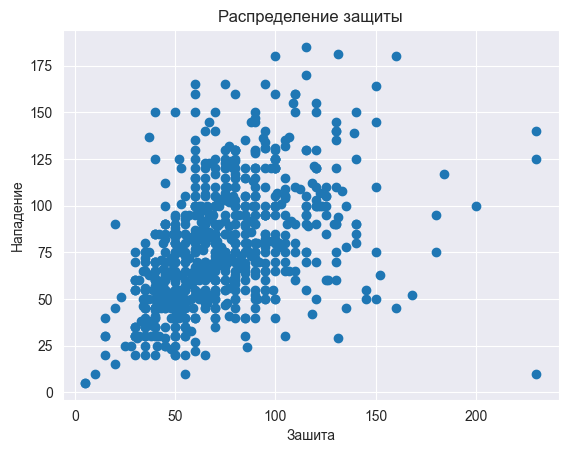

In [25]:
plt.title('Распределение защиты')
plt.xlabel('Зашита')
plt.ylabel('Нападение')
plt.scatter(df.defense, df.attack);

## Правило трех сигм

In [27]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [37]:
df.defense_z = (df.defense - df.defense.mean()) / df.defense.std()
df.defense_z

0     -0.780286
1     -0.325285
2      1.624720
3     -0.975286
4     -0.487785
         ...   
796    0.974718
797    1.884720
798   -0.650286
799    0.909718
800    1.364719
Name: defense, Length: 801, dtype: float64

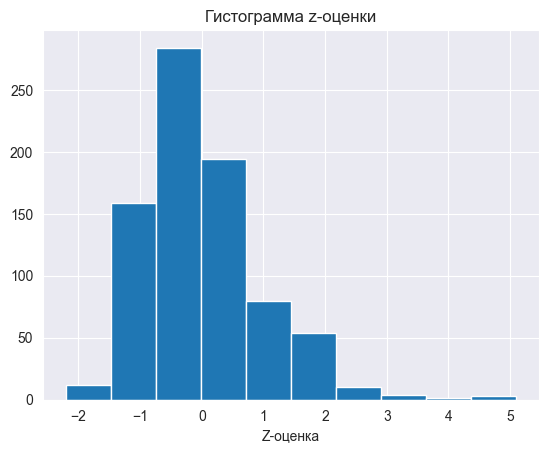

In [38]:
plt.title('Гистограмма z-оценки')
plt.xlabel('Z-оценка')
plt.hist(df.defense_z);

In [39]:
df[df.defense_z > 3]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.00,2.0,...,50.0,80,130,80,30,water,psychic,78.5,1,0
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.00,1.0,...,50.0,91,85,45,70,water,ice,132.5,1,0
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.50,1.0,...,50.0,208,55,95,30,steel,ground,400.0,2,0
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,...,50.0,213,10,230,5,bug,rock,20.5,2,0
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,50.0,306,60,80,50,steel,rock,360.0,3,0
376,"['Clear Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,...,NaN,377,50,100,50,rock,NaN,230.0,3,1
410,"['Sturdy', 'Soundproof']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,88.1,411,47,138,30,rock,steel,149.5,4,0
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.00,1.0,...,50.0,713,44,46,28,ice,NaN,505.0,6,0


In [40]:
df_new = df[df.defense_z > 3]
df_new

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.00,2.0,...,50.0,80,130,80,30,water,psychic,78.5,1,0
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.00,1.0,...,50.0,91,85,45,70,water,ice,132.5,1,0
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.50,1.0,...,50.0,208,55,95,30,steel,ground,400.0,2,0
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,...,50.0,213,10,230,5,bug,rock,20.5,2,0
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,50.0,306,60,80,50,steel,rock,360.0,3,0
376,"['Clear Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,...,NaN,377,50,100,50,rock,NaN,230.0,3,1
410,"['Sturdy', 'Soundproof']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,88.1,411,47,138,30,rock,steel,149.5,4,0
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.00,1.0,...,50.0,713,44,46,28,ice,NaN,505.0,6,0


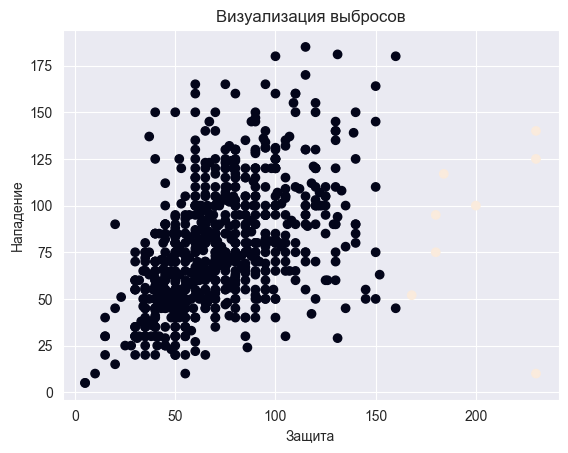

In [42]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df.defense, df.attack, c = df.defense_z > 3);

## Поиск выбросов на основе межквартального расстояния